In [1]:
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tracker
latest_date = tracker.figure_dates[-1]
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

In [2]:
latest_date='2022.08.23.17.20'

In [3]:
# setting input and output with jupyter notebook in context 
if 'ipykernel_launcher.py' in sys.argv[0]:
    input_fn = 'results/samplesheets/post-hicpro/{}.post-hicpro.google-samplesheet.tsv'.format(latest_date)
    output_prefix = 'results/samplesheets/post-hicpro/figure.samplesheet'
else:
    input_fn = sys.argv[1]
    output_prefix = sys.argv[2]

In [4]:
# loading the samplesheet
df = pd.read_table(input_fn, skiprows=0)

In [ ]:
df

In [6]:
# extract those samples which are ready for post-hicpro analyses and processing
ready_df = df.loc[(df['HiCPro Status'] == 1)]

# extract only the columns needed
major_cols = ['Sample Name (as used in the server)',
 'GSE ID',
 'Organism',
 'Biological Replicate Serial No',
 'ChIP-seq Pull Down',
 'Restriction Enzyme',
 'Cell Category',
 'Cell Type',
 'Cell Line or Primary']
ready_df = ready_df[major_cols]

In [7]:
ready_df

,Sample Name (as used in the server),GSE ID,Organism,Biological Replicate Serial No,ChIP-seq Pull Down,Restriction Enzyme,Cell Category,Cell Type,Cell Line or Primary
0,293T,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
1,293T,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
2,293T,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
3,293T,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
4,293T-PDS,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
5,293T-PDS,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
6,293T-TMPYP4,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
7,293T-TMPYP4,GSE128106,Homo sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line
8,A673_SA1m1,GSE133227,Homo sapiens,1,CTCF,MboI,Cancer,A673,Cell Line
9,A673_SA1m1,GSE133227,Homo sapiens,2,CTCF,MboI,Cancer,A673,Cell Line


In [8]:
# capitalizes organism
def parse_organism(string):
    new_words = []
    for word in string.split():
        new_words.append(word.capitalize())
    new_string = '_'.join(new_words)
    return(new_string)

ready_df.loc[:, 'Organism'] = ready_df.loc[:, 'Organism'].apply(parse_organism)

In [9]:
# getting the sample names
sample_names = []
for i, sr in ready_df.iterrows():
    sample_name = '{sample_name}.{gse_id}.{organism}.{antibody_target}.b{biological_rep}'
    sample_name = sample_name.format(sample_name=sr[0],
                                     gse_id=sr[1],
                                     organism=sr[2],
                                     antibody_target=sr[4], 
                                     biological_rep=sr[3])
    sample_names.append(sample_name)
ready_df.loc[:, 'sample_name'] = sample_names

In [10]:
# renaming the columns for easy computational use 
ready_df.columns = ['sample_name', 'gse_id',
                    'organism', 'bio_rep', 'antibody_target',
                    'restriction_enzyme', 'cell_category', 'cell_type', 'cell_source', 'std_sample_name']

In [11]:
# reorder the columns
reorder = ['std_sample_name',
             'gse_id',
             'organism',
             'bio_rep',
             'antibody_target',
             'restriction_enzyme',
             'cell_category',
             'cell_type',
             'cell_source',
             'sample_name']
ready_df = ready_df[reorder]
final_df = ready_df.drop_duplicates().reset_index(drop=True)

In [12]:
final_df

,std_sample_name,gse_id,organism,bio_rep,antibody_target,restriction_enzyme,cell_category,cell_type,cell_source,sample_name
0,293T.GSE128106.Homo_Sapiens.YY1.b1,GSE128106,Homo_Sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line,293T
1,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,GSE128106,Homo_Sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line,293T-PDS
2,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,GSE128106,Homo_Sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line,293T-TMPYP4
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,GSE133227,Homo_Sapiens,1,CTCF,MboI,Cancer,A673,Cell Line,A673_SA1m1
4,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,GSE133227,Homo_Sapiens,2,CTCF,MboI,Cancer,A673,Cell Line,A673_SA1m1
5,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,GSE133227,Homo_Sapiens,1,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1
6,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,GSE133227,Homo_Sapiens,2,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1
7,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3,GSE133227,Homo_Sapiens,3,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1
8,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4,GSE133227,Homo_Sapiens,4,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1
9,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,GSE133227,Homo_Sapiens,5,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1


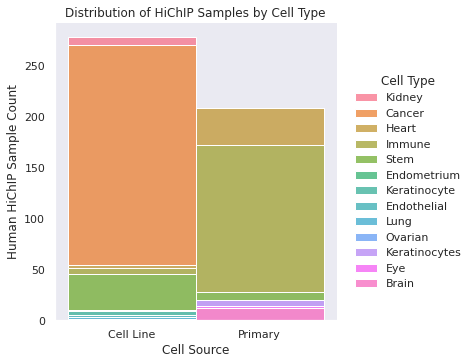

In [15]:
cols = ['sn', 'gse', 'o', 'bio', 'a', 'r', 'Cell Type', 'c', 'cell_source', 's']
final_df.columns = cols
sns.set(rc = {'figure.figsize':(5,10)})
sns.set_theme(style="dark")
palette = [
'#1f78b4',
'#a6cee3',
'#33a02c',
'#b2df8a',

'#fb9a99',
'#e31a1c',
'#fdbf6f',
'#ff7f00',
'#cab2d6',
'#6a3d9a',
'#ffed6f',
'#b15928']
sns.set_palette(palette)
ax = sns.displot(x="cell_source", hue="Cell Type", data=final_df, multiple="stack")
ax.set(xlabel='Cell Source', ylabel='Human HiChIP Sample Count', title='Distribution of HiChIP Samples by Cell Type')
ax.savefig('dist-cell-type.png', dpi=300)

In [163]:
def label_protein(row):
    if row['a'] == 'YY1':
          return 'Transcription Factor'
    if row['a'] == 'CTCF':
          return 'Structural Maintenance Protein'
    if row['a'] == 'H3K27ac':
          return 'Histone Modification'
    if row['a'] == 'SMC1A':
          return 'Structural Maintenance Protein'
    if row['a'] == 'Rad21':
          return 'Structural Maintenance Protein'
    if row['a'] == 'OCT4':
          return 'Transcription Factor'
    if row['a'] == 'NANOG':
          return 'Transcription Factor'
    if row['a'] == 'KLF4':
          return 'Transcription Factor'
    if row['a'] == 'H3K4me1':
          return 'Histone Modification'
    if row['a'] == 'RNA-Pol-II':
          return 'Transcription Factor'
    if row['a'] == 'V5':
          return 'Transcription Factor'
    if row['a'] == 'H3K27me3':
          return 'Histone Modification'
    if row['a'] == 'PR':
          return 'Transcription Factor'
    if row['a'] == 'H3K4me3':
          return 'Histone Modification'
    if row['a'] == 'H3K4me4':
          return 'Histone Modification'
    return 'Other'

In [165]:
final_df = final_df.replace("SMC1", value="SMC1A")
final_df['Protein Type'] = final_df.apply(lambda row: label_protein(row), axis=1)
final_df

,sn,gse,o,bio,a,r,Cell Type,c,cell_source,s,Protein Type
0,293T.GSE128106.Homo_Sapiens.YY1.b1,GSE128106,Homo_Sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line,293T,Transcription Factor
1,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,GSE128106,Homo_Sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line,293T-PDS,Transcription Factor
2,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,GSE128106,Homo_Sapiens,1,YY1,HindIII,Kidney,HEK293T,Cell Line,293T-TMPYP4,Transcription Factor
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,GSE133227,Homo_Sapiens,1,CTCF,MboI,Cancer,A673,Cell Line,A673_SA1m1,Structural Maintenance Protein
4,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,GSE133227,Homo_Sapiens,2,CTCF,MboI,Cancer,A673,Cell Line,A673_SA1m1,Structural Maintenance Protein
5,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,GSE133227,Homo_Sapiens,1,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1,Structural Maintenance Protein
6,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,GSE133227,Homo_Sapiens,2,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1,Structural Maintenance Protein
7,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3,GSE133227,Homo_Sapiens,3,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1,Structural Maintenance Protein
8,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4,GSE133227,Homo_Sapiens,4,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1,Structural Maintenance Protein
9,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,GSE133227,Homo_Sapiens,5,CTCF,MboI,Cancer,A673,Cell Line,A673_SA2m1,Structural Maintenance Protein


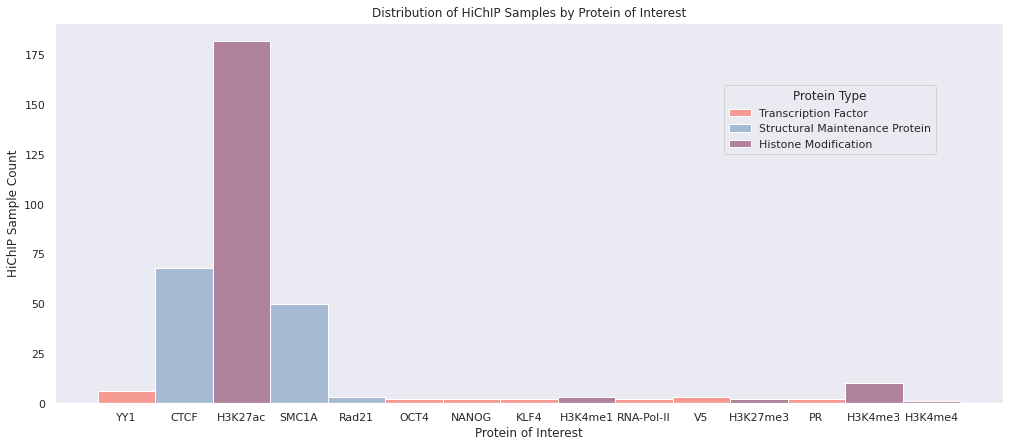

In [184]:
sns.set(rc = {'figure.figsize':(17,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x="a", data=final_df, multiple="stack", hue="Protein Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(.70, .85))
ax.set(xlabel='Protein of Interest', ylabel='HiChIP Sample Count', title='Distribution of HiChIP Samples by Protein of Interest')
fig = ax.get_figure()
fig.savefig('dist-chip-pulldown.png', dpi=300) 